In [17]:
import pandas as pd
import seaborn as sns
from math import ceil
import matplotlib.pyplot as plt
sns.set()

In [11]:
def links(n):
    groups = ceil((float(n) / 150.0))
    return 6 + 5*2 + 16 + 3 * (groups * 3 + 1) + 2 * (groups * 5 + 1) + (groups * 4 + 1) + 6 * n

def coupleds(n):
    groups = int(ceil(float(n) / 150))
    return 1 + 3 + 2 * (1 + groups) + 4 + 4 * groups

def atomics(n):
    groups = int(ceil(float(n) / 150))
    return 3 + 6 + 6 * groups + 6 * n

In [14]:
df = pd.read_csv('../results/result.csv', sep=';')
df['atomics'] = df['reactions'].apply(atomics)
df['coupleds'] = df['reactions'].apply(coupleds)
df['memory GB'] = df['ram_kb'].apply(lambda m: m / 1024.0 / 1024.0)
df.head()

,reactions,process,time_seconds,ram_kb,atomics,coupleds,memory GB
0,1,compile,45.59,2062104,21,16,1.966576
1,3,compile,43.67,2073976,33,16,1.977898
2,5,compile,43.44,2086700,45,16,1.990032
3,7,compile,43.76,2101724,57,16,2.004360
4,9,compile,44.36,2116352,69,16,2.018311


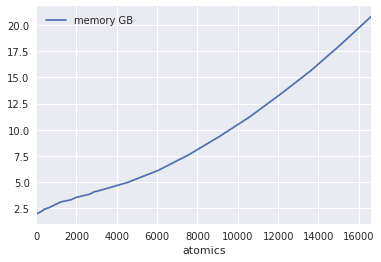

In [20]:
df[df.process == 'compile'].plot(x='atomics', y='memory GB')
plt.show()